Context: This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

• Perform EDA and Explore the features using histograms

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

iris = pd.read_csv('./iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


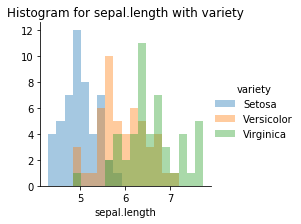

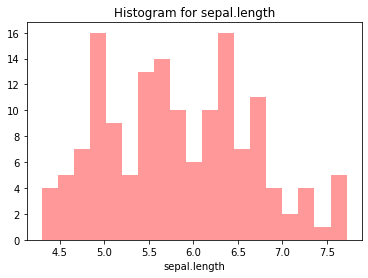

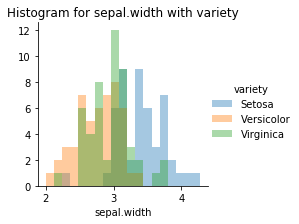

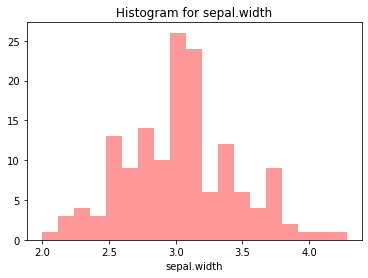

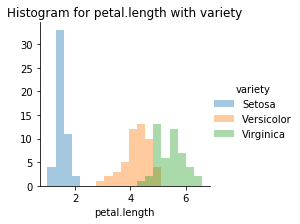

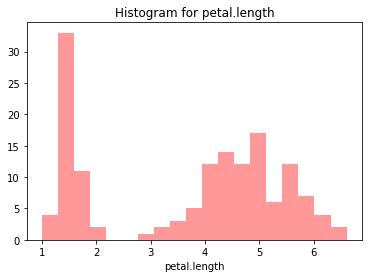

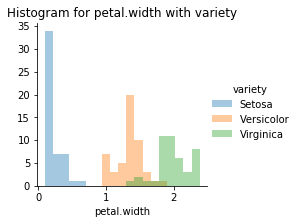

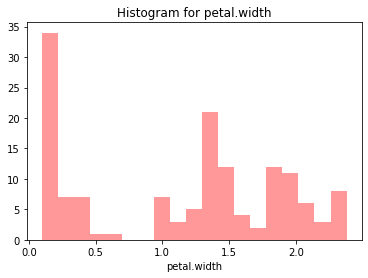

In [4]:
for i in ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']:
    xmin = min(iris['{}'.format(i)])
    xmax = max(iris['{}'.format(i)])
    width = (xmax - xmin) / 20
    sns.FacetGrid(iris,hue="variety").map(sns.distplot,'{}'.format(i), kde=False, bins=np.arange(xmin, xmax, width)).add_legend()
    plt.title('Histogram for {} with variety'.format(i))
    plt.show()
    sns.distplot(iris['{}'.format(i)], color='r', kde=False, bins=np.arange(xmin, xmax, width))
    plt.title('Histogram for {}'.format(i))
    plt.show()

• Encode the target variable ie convert it to numeric type

In [5]:
variety_num = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

iris['variety'] = iris['variety'].map(variety_num)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


• Experiment using two different ratios of training, validation and test data ie 60-20-20, 80-10-10. On the two different split ratios do the following

o Implement KFold Cross Validation

o Implement Grid Search to find optimal hyperparameters for any 3 algorithms (out of LR, SVM, MLP, RF, Boosting)

o Analyze the results on Validation set and test set and mention which model performed the best and why?

o Compare the performance of models(using precision, recall, accuracy, latency). What was the best proportion or split ratio of data from the set of experiments you conducted?

In [6]:
from sklearn.model_selection import train_test_split

features = iris.drop('variety', axis=1)
labels = iris['variety']

Ratios of training, validation and test data ie 60-20-20

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [8]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [9]:
X_train.to_csv('./train_features602020.csv', index=False)
X_val.to_csv('./val_features602020.csv', index=False)
X_test.to_csv('./test_features602020.csv', index=False)

y_train.to_csv('./train_labels602020.csv', index=False)
y_val.to_csv('./val_labels602020.csv', index=False)
y_test.to_csv('./test_labels602020.csv', index=False)

In [10]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tr_features602020 = pd.read_csv('./train_features602020.csv')
tr_labels602020 = pd.read_csv('./train_labels602020.csv')

Logistic Regression 60-20-20

In [11]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [12]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [13]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features602020, tr_labels602020.values.ravel())

print_results(cv)

D:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

BEST PARAMS: {'C': 1}

0.622 (+/-0.333) for {'C': 0.001}
0.833 (+/-0.199) for {'C': 0.01}
0.911 (+/-0.166) for {'C': 0.1}
0.944 (+/-0.172) for {'C': 1}
0.944 (+/-0.122) for {'C': 10}
0.944 (+/-0.172) for {'C': 100}
0.944 (+/-0.172) for {'C': 1000}


D:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [14]:
cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
joblib.dump(cv.best_estimator_, './LR_model602020.pkl')

['./LR_model602020.pkl']

Support Vector Machines 60-20-20

In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features602020, tr_labels602020.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.922 (+/-0.113) for {'C': 0.1, 'kernel': 'linear'}
0.8 (+/-0.218) for {'C': 0.1, 'kernel': 'rbf'}
0.956 (+/-0.083) for {'C': 1, 'kernel': 'linear'}
0.922 (+/-0.113) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.109) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [18]:
cv.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
joblib.dump(cv.best_estimator_, './SVM_model602020.pkl')

['./SVM_model602020.pkl']

Multilayer Perceptron 60-20-20

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features602020, tr_labels602020.values.ravel())

print_results(cv)

D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.789 (+/-0.354) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.578 (+/-0.249) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.622 (+/-0.31) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.944 (+/-0.122) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.922 (+/-0.113) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.967 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.944 (+/-0.07) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.956 (+/-0.083) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.978 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learnin

D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [22]:
cv.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [23]:
joblib.dump(cv.best_estimator_, './MLP_model602020.pkl')

['./MLP_model602020.pkl']

Random Forest 60-20-20

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features602020, tr_labels602020.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.911 (+/-0.194) for {'max_depth': 2, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 250}
0.922 (+/-0.206) for {'max_depth': 4, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 4, 'n_estimators': 50}
0.933 (+/-0.215) for {'max_depth': 4, 'n_estimators': 250}
0.922 (+/-0.151) for {'max_depth': 8, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 8, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 8, 'n_estimators': 250}
0.922 (+/-0.206) for {'max_depth': 16, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 16, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 16, 'n_estimators': 250}
0.889 (+/-0.122) for {'max_depth': 32, 'n_estimators': 5}
0.9 (+/-0.178) for {'max_depth': 32, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 32, 'n_estimators': 250}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.20

In [26]:
joblib.dump(cv.best_estimator_, './RF_model602020.pkl')

['./RF_model602020.pkl']

Boosting 60-20-20

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features602020, tr_labels602020.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.6 (+/-0.452) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.933 (+/-0.215) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.922 (+/-0.206) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.711 (+/-0.247) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.733 (+/-0.276) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.911 (+/-0.194) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.911 (+/-0.194) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.9 (+/-0.178) for {'learning_rate': 0

In [29]:
joblib.dump(cv.best_estimator_, './GB_model602020.pkl')

['./GB_model602020.pkl']

Testing 60-20-20

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


iris = load_iris()
X = iris.data
y = iris.target
X_model, X_test, y_model, y_test = train_test_split(X, y, random_state=101, test_size=0.2)

# clf = LogisticRegression(max_iter=110, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0])
# clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, bootstrap=True, random_state=None, min_samples_split=2)
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)

yy_=[]
for i in range(10):
    X_train, X_valid, y_train, y_valid = train_test_split(X_model, y_model, random_state=101, test_size=0.25)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    diff = y_pred - y_valid
    tmp = diff[diff==0]
    yy_.append(round(len(tmp)/len(y_pred), 2))
    print(yy_)
print('np.norm: ', np.mean(yy_))


[0.93]
[0.93, 0.93]
[0.93, 0.93, 0.93]
[0.93, 0.93, 0.93, 0.93]
[0.93, 0.93, 0.93, 0.93, 0.93]
[0.93, 0.93, 0.93, 0.93, 0.93, 0.93]
[0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93]
[0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93]
[0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93]
[0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93]
np.norm:  0.93


In [30]:
models = {}

import pickle

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('./{}_model602020.pkl'.format(mdl))

NameError: name 'joblib' is not defined

In [32]:
models

{'LR': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'SVM': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'MLP': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='adaptive',
               learning_rate_init=0.001, max_fun=15000, max_iter=200,
               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
               power_t=0.5, random_s

In [33]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000)))

In [34]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features602020, val_labels602020)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1ms
MLP -- Accuracy: 0.967 / Precision: 0.952 / Recall: 0.974 / Latency: 1ms
RF -- Accuracy: 0.967 / Precision: 0.976 / Recall: 0.944 / Latency: 44ms
GB -- Accuracy: 0.967 / Precision: 0.976 / Recall: 0.944 / Latency: 1ms


In [35]:
evaluate_model('Logistic Regression', models['LR'], te_features602020, te_labels602020)

Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1ms


Ratios of training, validation and test data ie 80-10-10

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [37]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


In [38]:
X_train.to_csv('./train_features801010.csv', index=False)
X_val.to_csv('./val_features801010.csv', index=False)
X_test.to_csv('./test_features801010.csv', index=False)

y_train.to_csv('./train_labels801010.csv', index=False)
y_val.to_csv('./val_labels801010.csv', index=False)
y_test.to_csv('./test_labels801010.csv', index=False)

In [39]:
tr_features801010 = pd.read_csv('./train_features801010.csv')
tr_labels801010 = pd.read_csv('./train_labels801010.csv')

Logistic Regression 80-10-10

In [40]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [41]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features801010, tr_labels801010.values.ravel())

print_results(cv)

D:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

BEST PARAMS: {'C': 1}

0.817 (+/-0.201) for {'C': 0.001}
0.858 (+/-0.194) for {'C': 0.01}
0.933 (+/-0.113) for {'C': 0.1}
0.967 (+/-0.097) for {'C': 1}
0.942 (+/-0.113) for {'C': 10}
0.95 (+/-0.122) for {'C': 100}
0.95 (+/-0.122) for {'C': 1000}


In [42]:
cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
joblib.dump(cv.best_estimator_, './LR_model801010.pkl')

['./LR_model801010.pkl']

Support Vector Machines 80-10-10

In [44]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features801010, tr_labels801010.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.942 (+/-0.125) for {'C': 0.1, 'kernel': 'linear'}
0.892 (+/-0.155) for {'C': 0.1, 'kernel': 'rbf'}
0.958 (+/-0.091) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'rbf'}


In [45]:
cv.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
joblib.dump(cv.best_estimator_, './SVM_model801010.pkl')

['./SVM_model801010.pkl']

Multilayer Perceptron 80-10-10

In [47]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features801010, tr_labels801010.values.ravel())

print_results(cv)

D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.783 (+/-0.133) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.758 (+/-0.238) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.817 (+/-0.201) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.975 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.958 (+/-0.129) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.958 (+/-0.129) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.967 (+/-0.097) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.967 (+/-0.097) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.975 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_

D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [48]:
cv.best_estimator_

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [49]:
joblib.dump(cv.best_estimator_, './MLP_model801010.pkl')

['./MLP_model801010.pkl']

Random Forest 80-10-10

In [50]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features801010, tr_labels801010.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.933 (+/-0.155) for {'max_depth': 2, 'n_estimators': 5}
0.942 (+/-0.163) for {'max_depth': 2, 'n_estimators': 50}
0.933 (+/-0.155) for {'max_depth': 2, 'n_estimators': 250}
0.925 (+/-0.097) for {'max_depth': 4, 'n_estimators': 5}
0.95 (+/-0.122) for {'max_depth': 4, 'n_estimators': 50}
0.958 (+/-0.091) for {'max_depth': 4, 'n_estimators': 250}
0.942 (+/-0.155) for {'max_depth': 8, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 8, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 8, 'n_estimators': 250}
0.917 (+/-0.129) for {'max_depth': 16, 'n_estimators': 5}
0.933 (+/-0.1) for {'max_depth': 16, 'n_estimators': 50}
0.958 (+/-0.091) for {'max_depth': 16, 'n_estimators': 250}
0.942 (+/-0.113) for {'max_depth': 32, 'n_estimators': 5}
0.933 (+/-0.1) for {'max_depth': 32, 'n_estimators': 50}
0.942 (+/-0.113) for {'max_depth': 32, 'n_estimators': 250}
0.942 (+/-0.113) for {'max_depth': None, 'n_estimators': 5}
0.95 (+/-0.122) fo

In [51]:
joblib.dump(cv.best_estimator_, './RF_model801010.pkl')

['./RF_model801010.pkl']

Boosting 80-10-10

In [52]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features801010, tr_labels801010.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.858 (+/-0.208) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.908 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.958 (+/-0.091) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.95 (+/-0.082) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.942 (+/-0.125) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.942 (+/-0.113) for {'learning_rate

In [53]:
joblib.dump(cv.best_estimator_, './GB_model801010.pkl')

['./GB_model801010.pkl']

Testing 80-10-10

In [54]:
val_features801010 = pd.read_csv('./val_features801010.csv')
val_labels801010 = pd.read_csv('./val_labels801010.csv')

te_features801010 = pd.read_csv('./test_features801010.csv')
te_labels801010 = pd.read_csv('./test_labels801010.csv')

In [55]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('./{}_model801010.pkl'.format(mdl))

In [56]:
models

{'LR': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'SVM': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'MLP': MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='constant',
               learning_rate_init=0.001, max_fun=15000, max_iter=200,
               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
               power_t=0.5, random_s

In [57]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [58]:
for name, mdl in models.items():
    evaluate_model(name, mdl, te_features801010, te_labels801010)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
MLP -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 36.9ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms


In [59]:
evaluate_model('Logistic Regression', models['LR'], te_features801010, te_labels801010)

Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
